# Contents
- [00 Setup](#00-Setup)
- [01 Glossary](#01-Glossary)
- [02 Continuous Distributions](#02-Continuous-Distributions)
- [03 Discrete Distributions](#03-Discrete-Distributions)
- [Scratch Notes](#Scratch-Notes)

___

# 00 Setup


In [12]:
import numpy as np
from scipy.stats import uniform
import scipy.stats as stats

import matplotlib.pyplot as plt


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

[Back to the top](#Contents)

# 01 Glossary



- `Random Variable`: A variable whose values depend on outcomes of a random phenomenon. Usually denoted by X. X can be Discrete or Continous.
- `Probability Distribution`: Probability values for each values a random variable can theoritically take. Also known as Probability Density Function (PDF).
- `Cumulative Distribution Function` (CDF): A function that describes the probability that a random variable takes on a value less than or equal to a certain value. Think of the sum total of all probability from X = -Infinity to X = 10.

___
[Back to the top](#Contents)

# 02 Continuous Distributions

#### `Must know` Continuous Distributions
- [Uniform](#Uniform-distribution)
- [Normal](#Normal-(gaussian)-distribution)
- [Exponential](#Exponential-distribution)
- [Chi-squared](#Chi-squared-distribution)
- [T](#T-distribution)

#### `Good to know` Continuous Distributions
- [F Distribution](#F-distribution)
- [Beta Distribution](#Beta-distribution)
- [Gamma Distribution](#Gamma-distribution)
- [Log-Normal Distribution](#Log-Normal-distribution)
- [Weibull Distribution](#Weibull-distribution)

## Uniform distribution

#### Generate Random Values

In [13]:
# Parameters describing the shape and size of the uniform distribution
# Min is often denoted as 'a' and max as 'b'

min = 0
max = 10
n = 5

# Generate n random variables from a uniform distribution between x=min and x=max
random_variables = uniform.rvs(loc=min, scale=max-min, size=n)
print("Random Variables:", random_variables)

Random Variables: [9.05587681 1.01460898 5.68685341 8.67566403 8.019242  ]


#### Visualization of Probability
- Sum of area under probability density curve = 1 given probability of each possible X add up to 1

Text(0.5, 1.0, 'Uniform Probability Distribution')

Text(0.5, 0, 'X (Random Variable)')

Text(0, 0.5, 'Probability (Probability Density Function) ')

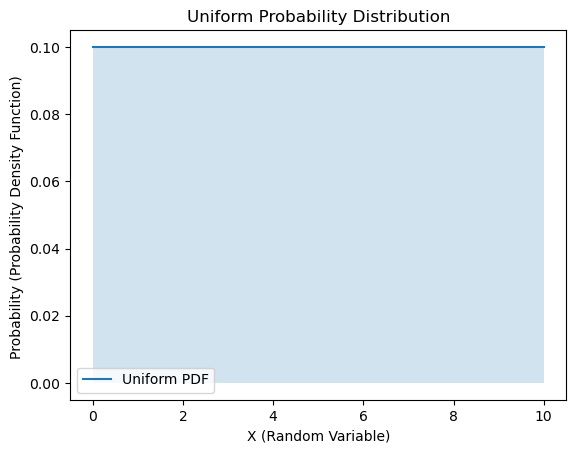

In [14]:
min = 0
max = 10
n = 5

x = np.linspace(min, max, 5)
density = uniform.pdf(x, loc=min, scale=max-min)

# Plotting
plt.plot(x, density, label='Uniform PDF')
plt.fill_between(x, density, alpha=0.2)  # Fill under the curve
plt.title('Uniform Probability Distribution')
plt.xlabel('X (Random Variable)')
plt.ylabel('Probability (Probability Density Function) ')
plt.legend()
plt.show()

#### Cumulative Distribution Function

In [16]:
# Calculate the cumulative probability for specific points
# CDF: What is the total probability p from X= -Infinity to X = x

distribution = uniform.cdf(x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], loc=min, scale=max-min)
print("Distribution:", distribution)

Distribution: [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


#### Quantiles

In [17]:
# Calculate the quantiles for specific probabilities
# Till what X = x is the total probability = p
# PPF: Percent Point Function is the inverse of CDF

quantiles = uniform.ppf(q = [0.25, 0.5, 0.75], loc=min, scale=max-min)
print("Quantiles:", quantiles)

Quantiles: [2.5 5.  7.5]


#### Mean, Median and Variance

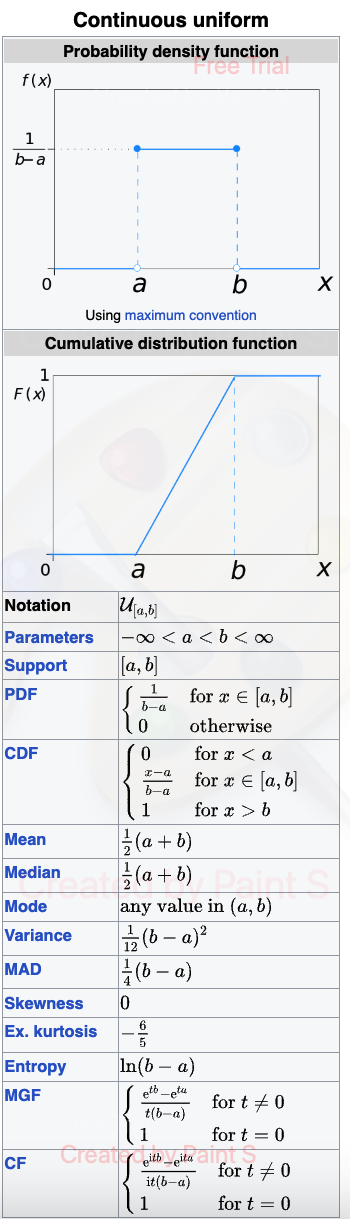

In [18]:
# Calculate the mean
# Mean of the uniform distribution = (Max + Min) /2 
stats.uniform(min, max - min).mean()

# Calculate the Median
# Median of the uniform distribution = (Max + Min) /2 
stats.uniform(min, max - min).median()

# Calculate the Variance
# Variance of the uniform distribution = (Max - Min)^2 / 12
stats.uniform(min, max - min).var()

5.0

5.0

8.333333333333332

[Back to the Continuous Distributions](#02-Continuous-Distributions)

[Back to the top](#Contents)

## Normal (gaussian) distribution

#### Generate Random Values

#### Visualization of Probability
- Sum of area under probability density curve = 1 given probability of each possible X add up to 1

#### Cumulative Distribution Function

#### Quantiles

#### Mean, Median and Variance

[Back to the Continuous Distributions](#02-Continuous-Distributions)

[Back to the top](#Contents)

## Exponential distribution

#### Generate Random Values

#### Visualization of Probability
- Sum of area under probability density curve = 1 given probability of each possible X add up to 1

#### Cumulative Distribution Function

#### Quantiles

#### Mean, Median and Variance

[Back to the Continuous Distributions](#02-Continuous-Distributions)

[Back to the top](#Contents)

## Chi-squared distribution

#### Generate Random Values

#### Visualization of Probability
- Sum of area under probability density curve = 1 given probability of each possible X add up to 1

#### Cumulative Distribution Function

#### Quantiles

#### Mean, Median and Variance

[Back to the Continuous Distributions](#02-Continuous-Distributions)

[Back to the top](#Contents)

## T distribution

#### Generate Random Values

#### Visualization of Probability
- Sum of area under probability density curve = 1 given probability of each possible X add up to 1

#### Cumulative Distribution Function

#### Quantiles

#### Mean, Median and Variance

[Back to the Continuous Distributions](#02-Continuous-Distributions)

[Back to the top](#Contents)
___

# 03 Discrete Distributions

#### `Must know` Discrete Distributions
- Poisson
- Binomial

#### `Good to know` Discrete Distributions
- Discrete Uniform distribution
- Geometric distribution

## Poisson distribution

#### Generate Random Values

#### Visualization of Probability
- Sum of area under probability density curve = 1 given probability of each possible X add up to 1

#### Cumulative Distribution Function

#### Quantiles

#### Mean, Median and Variance

[Back to the Discrete Distributions](#03-Discrete-Distributions)

[Back to the top](#Contents)

## Binomial distribution

#### Generate Random Values

#### Visualization of Probability
- Sum of area under probability density curve = 1 given probability of each possible X add up to 1

#### Cumulative Distribution Function

#### Quantiles

#### Mean, Median and Variance

[Back to the Discrete Distributions](#03-Discrete-Distributions)

[Back to the top](#Contents)

## Discrete Uniform distribution

## Geometric distribution

[Back to the Discrete Distributions](#03-Discrete-Distributions)

[Back to the top](#Contents)

____

## Continuous
#### Normal (Gaussian) Distribution

# Distributions

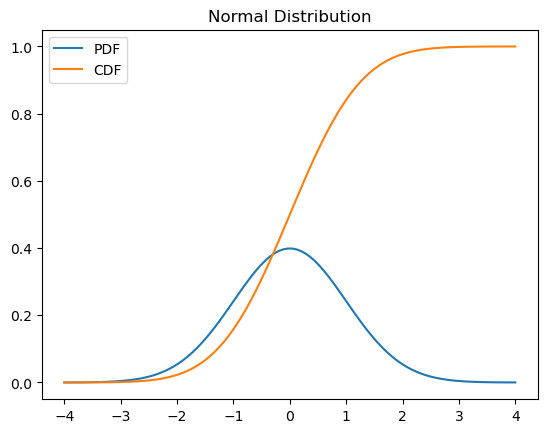

In [ ]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

# Parameters
mean = 0
std_dev = 1

# Generate random samples
samples = norm.rvs(loc=mean, scale=std_dev, size=1000)

# PDF and CDF
x = np.linspace(-4, 4, 100)
pdf = norm.pdf(x, loc=mean, scale=std_dev)
cdf = norm.cdf(x, loc=mean, scale=std_dev)

# Plot PDF and CDF
plt.plot(x, pdf, label="PDF")
plt.plot(x, cdf, label="CDF")
plt.legend()
plt.title("Normal Distribution")
plt.show()


#### Uniform Distribution

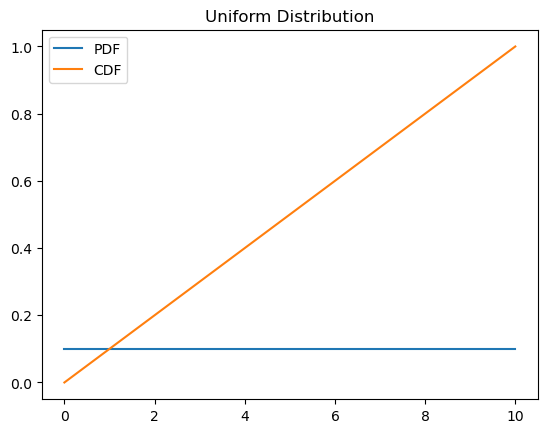

In [ ]:
from scipy.stats import uniform

# Parameters
a = 0  # Minimum
b = 10  # Maximum

# Generate random samples
samples = uniform.rvs(loc=a, scale=b-a, size=1000)

# PDF and CDF
x = np.linspace(a, b, 100)
pdf = uniform.pdf(x, loc=a, scale=b-a)
cdf = uniform.cdf(x, loc=a, scale=b-a)

# Plot PDF and CDF
plt.plot(x, pdf, label="PDF")
plt.plot(x, cdf, label="CDF")
plt.legend()
plt.title("Uniform Distribution")
plt.show()


#### Exponential Distribution

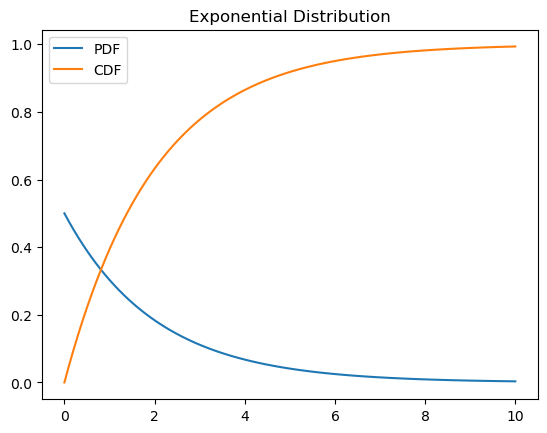

In [ ]:
from scipy.stats import expon

# Parameters
scale = 2  # 1/lambda

# Generate random samples
samples = expon.rvs(scale=scale, size=1000)

# PDF and CDF
x = np.linspace(0, 10, 100)
pdf = expon.pdf(x, scale=scale)
cdf = expon.cdf(x, scale=scale)

# Plot PDF and CDF
plt.plot(x, pdf, label="PDF")
plt.plot(x, cdf, label="CDF")
plt.legend()
plt.title("Exponential Distribution")
plt.show()


#### Gamma Distribution

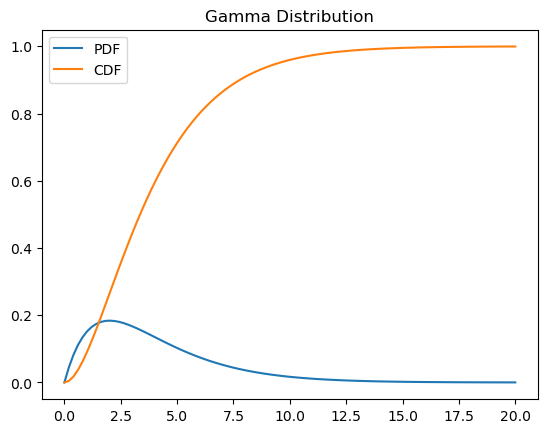

In [ ]:
from scipy.stats import gamma

# Parameters
shape = 2  # k
scale = 2  # theta

# Generate random samples
samples = gamma.rvs(a=shape, scale=scale, size=1000)

# PDF and CDF
x = np.linspace(0, 20, 100)
pdf = gamma.pdf(x, a=shape, scale=scale)
cdf = gamma.cdf(x, a=shape, scale=scale)

# Plot PDF and CDF
plt.plot(x, pdf, label="PDF")
plt.plot(x, cdf, label="CDF")
plt.legend()
plt.title("Gamma Distribution")
plt.show()


#### Beta Distribution

___
[Back to the top](#Contents)

# Scratch Notes

Joint, Marginal, and Conditional Probability:
Concepts necessary for understanding relationships between variables.
